In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

In [125]:
#import file
file_name = '/Users/suzybai/Downloads/loans_full_schema.csv'
df = pd.read_csv(file_name,low_memory=False)
df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


I. Describe dataset and any issues with it
there are 10000 observations and 55 columns for this dataset, and there are a lot of missing data and empty values


In [126]:
df.info() #there are 10000 entries and 55 columns for this dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
emp_title                           9167 non-null object
emp_length                          9183 non-null float64
state                               10000 non-null object
homeownership                       10000 non-null object
annual_income                       10000 non-null float64
verified_income                     10000 non-null object
debt_to_income                      9976 non-null float64
annual_income_joint                 1495 non-null float64
verification_income_joint           1455 non-null object
debt_to_income_joint                1495 non-null float64
delinq_2y                           10000 non-null int64
months_since_last_delinq            4342 non-null float64
earliest_credit_line                10000 non-null int64
inquiries_last_12m                  10000 non-null int64
total_credit_lines                  10000 non-null int64
open_credit_lines          

II. five visualizations

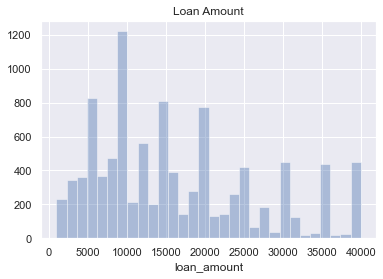

In [155]:
dist_plot=sns.distplot(df['loan_amount'],bins=30,kde=False)
dist_plot.set_title('Loan Amount')
plt.show()
#the most common loan amount is between 5000 and 10000

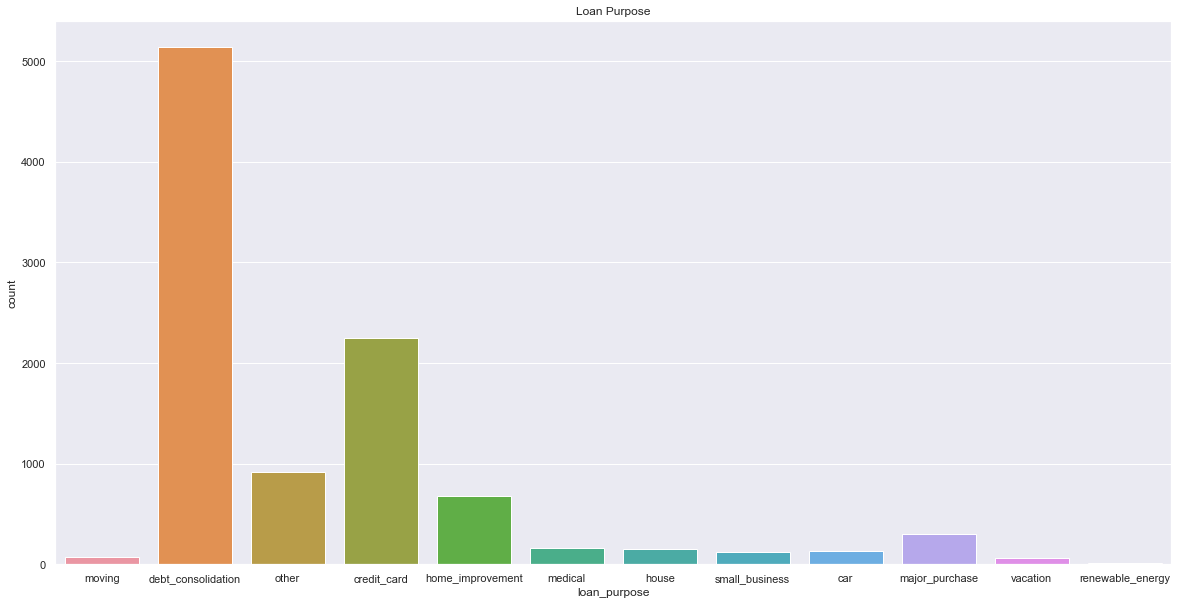

In [128]:
plt.figure(figsize=(20,10))
count_plt=sns.countplot(x="loan_purpose",data=df)
count_plt.set_title('Loan Purpose')
plt.show()
#debt consolidation is the major reason for people taking loans

In [29]:
pip install plotly-express

     |████████████████████████████████| 28.8 MB 6.4 MB/s eta 0:00:011    |█████████▉                      | 8.9 MB 43.8 MB/s eta 0:00:01               | 14.7 MB 43.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [129]:
from collections import Counter
import plotly.express as px
#df=codes_df[['state','annual_income']]
med=codes_df.groupby(by='state')['annual_income'].median()
df2=pd.DataFrame({'state':med.index, 'median':med.values},columns=['state','median'])
print(name)

#print(med)
fig = px.choropleth(df2,locations='state', locationmode='USA-states', scope='usa',color = 'median',color_continuous_scale="viridis_r")
fig.show()

Text(0.5, 1.0, 'daily gross revenue on day of week')

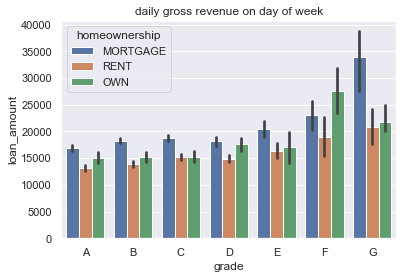

In [130]:

sns.barplot(x ='grade', y = 'loan_amount', hue ='homeownership' , data = df, order = ['A', 'B','C','D','E','F','G'])
plt.title('daily gross revenue on day of week')

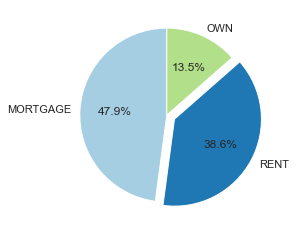

In [131]:
homeownership =df.homeownership.value_counts()
labels = list(df['homeownership'].value_counts().index)
color = sns.color_palette("Paired")
explode=(0,0.1,0) #only "explode" the 2nd slice
plt.pie(homeownership,labels=labels,autopct='%1.1f%%',explode=explode,startangle=90,colors=color)
plt.show()

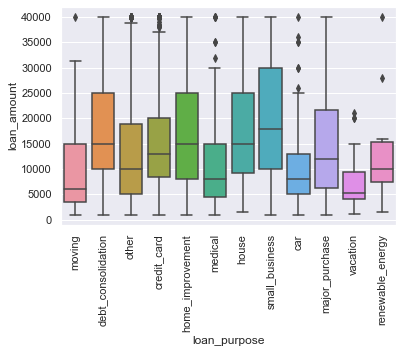

In [132]:
p1 = sns.boxplot(data=df, x = "loan_purpose", y = "loan_amount")
p1.set_xticklabels(p1.get_xticklabels(),rotation = 90)
plt.show()

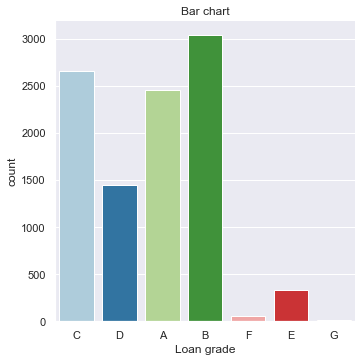

In [124]:
sns.catplot(x="grade", kind = "count", palette = color,data=df)
plt.title("Bar chart")
plt.xlabel("Loan grade")
plt.show()

III. Data cleaning

Before examining the data, we need to identify and delete columns that have lots of empty or missing values, and we also need to converts categorial data into dummy or indiccator variables (for example the unique job titles)

In [133]:
df.isnull().sum()


emp_title                            833
emp_length                           817
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
annual_income_joint                 8505
verification_income_joint           8545
debt_to_income_joint                8505
delinq_2y                              0
months_since_last_delinq            5658
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               7715
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_

models


Model2 Linear Regression

In [144]:
df_1 = df.drop(columns = ["emp_title", "emp_length","annual_income_joint",'annual_income_joint','verification_income_joint',
                        'debt_to_income_joint','months_since_last_delinq','months_since_90d_late','months_since_last_credit_inquiry',
                       'num_accounts_120d_past_due'])

In [145]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

In [146]:
df_1 = pd.get_dummies(df_1, drop_first = True, columns=[ 'state', 'homeownership',
                                                      'verified_income', 'loan_purpose', 'grade'])

In [178]:
x = df_1[[
 'delinq_2y',
 'earliest_credit_line',
 'num_collections_last_12m',
 'num_historical_failed_to_pay',
 'num_accounts_30d_past_due',
 'total_debit_limit',
 'num_total_cc_accounts',
 'num_cc_carrying_balance',
 'num_mort_accounts',
 'loan_amount',
 'state_AL',
 'state_AR',
 'state_AZ',
 'state_CA',
 'state_CO',
 'state_CT',
 'state_DC',
 'state_DE',
 'state_FL',
 'state_GA',
 'state_HI',
 'state_ID',
 'state_IL',
 'state_IN',
 'state_KS',
 'state_KY',
 'state_LA',
 'state_MA',
 'state_MD',
 'state_ME',
 'state_MI',
 'state_MN',
 'state_MO',
 'state_MS',
 'state_MT',
 'state_NC',
 'state_ND',
 'state_NE',
 'state_NH',
 'state_NJ',
 'state_NM',
 'state_NV',
 'state_NY',
 'state_OH',
 'state_OK',
 'state_OR',
 'state_PA',
 'state_RI',
 'state_SC',
 'state_SD',
 'state_TN',
 'state_TX',
 'state_UT',
 'state_VA',
 'state_VT',
 'state_WA',
 'state_WI',
 'state_WV',
 'state_WY',
 'homeownership_OWN',
 'homeownership_RENT',
 'verified_income_Source Verified',
 'verified_income_Verified',
 'loan_purpose_credit_card',
 'loan_purpose_debt_consolidation',
 'loan_purpose_home_improvement',
 'loan_purpose_house',
 'loan_purpose_major_purchase',
 'loan_purpose_medical',
 'loan_purpose_moving',
 'loan_purpose_other',
 'loan_purpose_renewable_energy',
 'loan_purpose_small_business',
 'loan_purpose_vacation']]
y = df_1['interest_rate']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 1/3)
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [182]:
regressor.intercept_
coef_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
coef_df

,Coefficient
delinq_2y,6.284770e-01
earliest_credit_line,2.560257e-02
num_collections_last_12m,4.317461e-01
num_historical_failed_to_pay,7.127670e-02
num_accounts_30d_past_due,1.972755e-09
...,...
loan_purpose_moving,2.831562e-01
loan_purpose_other,-1.606899e-01
loan_purpose_renewable_energy,9.089282e-01
loan_purpose_small_business,3.921541e-01


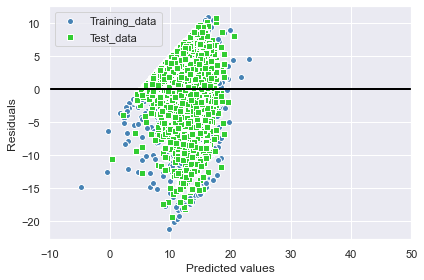

In [183]:
y_train_pred = regressor.predict(x_train)  
y_test_pred = regressor.predict(x_test)    
y_train_pred.shape, y_test_pred.shape


plt.scatter(y_train_pred, y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training_data')
plt.scatter(y_test_pred, y_test_pred-y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test_data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()
plt.show()

Random Forest

In [171]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 56 columns):
emp_title                           9167 non-null object
emp_length                          9183 non-null float64
state                               10000 non-null object
homeownership                       10000 non-null object
annual_income                       10000 non-null float64
verified_income                     10000 non-null object
debt_to_income                      9976 non-null float64
annual_income_joint                 1495 non-null float64
verification_income_joint           1455 non-null object
debt_to_income_joint                1495 non-null float64
delinq_2y                           10000 non-null int64
months_since_last_delinq            4342 non-null float64
earliest_credit_line                10000 non-null int64
inquiries_last_12m                  10000 non-null int64
total_credit_lines                  10000 non-null int64
open_credit_lines          

In [185]:
x.head()

,delinq_2y,earliest_credit_line,num_collections_last_12m,num_historical_failed_to_pay,num_accounts_30d_past_due,total_debit_limit,num_total_cc_accounts,num_cc_carrying_balance,num_mort_accounts,loan_amount,...,loan_purpose_debt_consolidation,loan_purpose_home_improvement,loan_purpose_house,loan_purpose_major_purchase,loan_purpose_medical,loan_purpose_moving,loan_purpose_other,loan_purpose_renewable_energy,loan_purpose_small_business,loan_purpose_vacation
0,0,2001,0,0,0,11100,14,6,1,28000,...,0,0,0,0,0,1,0,0,0,0
1,0,1996,0,1,0,16500,24,4,0,5000,...,1,0,0,0,0,0,0,0,0,0
2,0,2006,0,0,0,4300,14,6,0,2000,...,0,0,0,0,0,0,1,0,0,0
3,0,2007,0,1,0,19400,3,2,0,21600,...,1,0,0,0,0,0,0,0,0,0
4,0,2008,0,0,0,32700,20,13,0,23000,...,0,0,0,0,0,0,0,0,0,0


In [184]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(x_train, y_train) 

RandomForestRegressor()

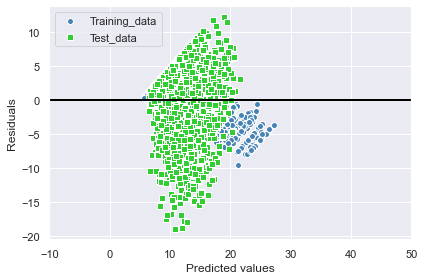

In [186]:
y_train_pred = regressor.predict(x_train)  
y_test_pred = regressor.predict(x_test)    
y_train_pred.shape, y_test_pred.shape


plt.scatter(y_train_pred, y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training_data')
plt.scatter(y_test_pred, y_test_pred-y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test_data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()
plt.show()

If I had more time, i'd like to do more regularization or normailization for the dataset when cleaning the data （for example, for variables like annual income, total credit_limit, total_debt_limit), as there are too many missing values.
In addition, there are some variables that I could do further classification. For example, total_debit_limit has too many classifications right now, but I can further classify it into several general classification.

Also, I'd like to generate the correlation for these variables and delete variables that are correlated, and keep variables that are independent.